## Programação Inteira e Otimização em Redes

#### Lista II

***Problema do Caixeiro Viajante***

**Autor:** Guilherme Cadori

**Data:** 02/09/2023

#### 1) Gerando Instâncias

In [1]:
# Importando bibliotecas de trabalho
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rdm


Nós da Instância I: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Nós da Instância II: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Nós da Instância III: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


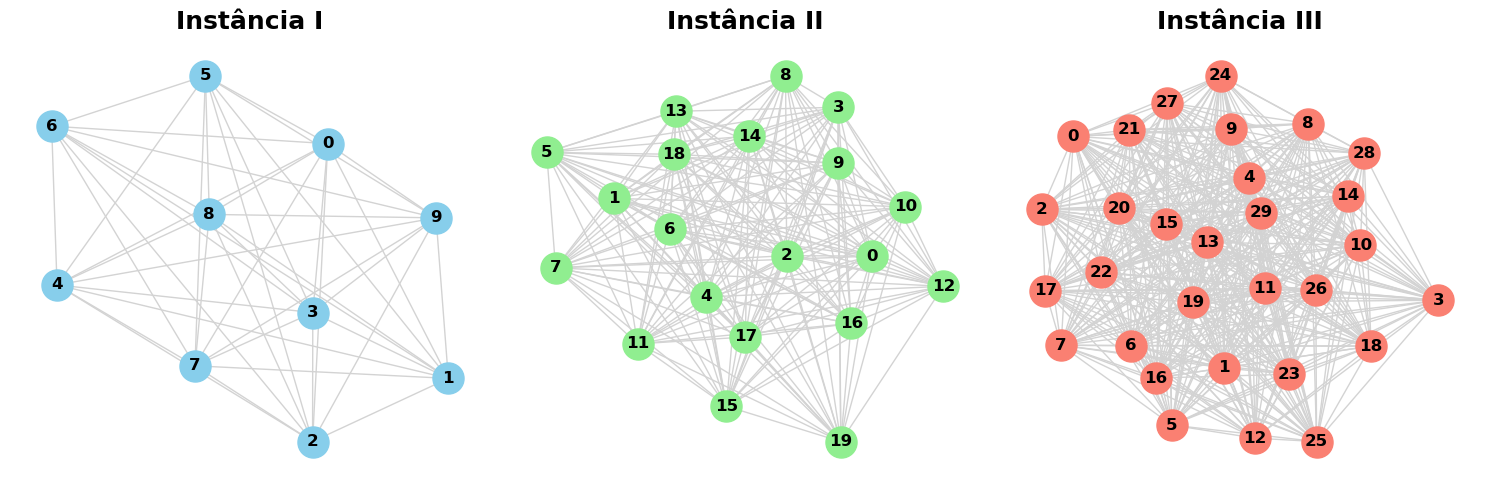

In [2]:
# Fixando parâmetro para geração de pontos aletórios para garantir reproducibilidade
np.random.seed(12345)

## Criando instância de 10 pontos aletórios
# Quantidade de nós
nodesInst1 = 10

inst1 = nx.complete_graph(nodesInst1)

# Adicionando pesos aos arcos
for (u, v) in inst1.edges():
    inst1.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids1 = [node for node in inst1.nodes()]

print('Nós da Instância I:', node_ids1)

## Criando instância de 20 pontos aletórios
# Quantidade de nós
nodesInst2 = 20

inst2 = nx.complete_graph(nodesInst2)

# Adicionando pesos aos arcos
for (u, v) in inst2.edges():
    inst2.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids2 = [node for node in inst2.nodes()]

print('Nós da Instância II:', node_ids2)

## Criando instância de 30 pontos aleatórios
# Quantidade de nós
nodesInst3 = 30

inst3 = nx.complete_graph(nodesInst3)

# Adicionando pesos aos arcos
for (u, v) in inst3.edges():
    inst3.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids3 = [node for node in inst3.nodes()]

print('Nós da Instância III:', node_ids3)

# Criando figura com sub-gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotando todas as instâncias em forma rede
# Grafo 1
graph1 = nx.draw(inst1,
                 with_labels=True,
                 node_size=500,
                 node_color='skyblue', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[0])

axes[0].set_title('Instância I', fontsize=18, fontweight='bold')

# Grafo 2
graph2 = nx.draw(inst2,
                 with_labels=True, 
                 node_size=500,
                 node_color='lightgreen', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[1])

axes[1].set_title('Instância II', fontsize=18, fontweight='bold')

# Grafo 3
graph3 = nx.draw(inst3,
                 with_labels=True, 
                 node_size=500,
                 node_color='salmon',
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[2])

axes[2].set_title('Instância III', fontsize=18, fontweight='bold')

# Plotando imagem
plt.tight_layout()
plt.show()


In [3]:
# Extraindo distâncias entra cada nó para todos os grafos
edge_weights_inst1 = nx.get_edge_attributes(inst1, 'weight')
edge_weights_inst2 = nx.get_edge_attributes(inst2, 'weight')
edge_weights_inst3 = nx.get_edge_attributes(inst3, 'weight')

# Conferindo distâncias extraídas
# print(" Edge Weights for Instance 1:\n", edge_weights_inst1)
# print("\n Edge Weights for Instance 2:\n", edge_weights_inst2)
# print("\n Edge Weights for Instance 3:\n", edge_weights_inst3)


In [4]:
# Crinado matrizes de distância

# Criando função para auxiliar na criação E VISUALIZAÇÃO da matriz
def distanceMatrix(edge_weights_dict, num_nodes):
    import pandas as pd
    
    # Criando uma matriz quadrar com valores proxy antes se de ser preenchida
    distance_matrix = [[float(0)] * num_nodes for _ in range(num_nodes)]

    # Preenchendo a matriz com o valores reais
    # Assumindo que se trata de um grafo completo não direcionado
    for (u, v), weight in edge_weights_dict.items():
        distance_matrix[u - 1][v - 1] = weight
        distance_matrix[v - 1][u - 1] = weight 
        
    # Criando um pandas dataframe para armazenar as distâncias
    df = pd.DataFrame(distance_matrix)

    return df

# Criando função para auxiliar na criação da matriz
def distanceMatrixDados(edge_weights_dict, num_nodes):
   
    # Criando uma matriz quadrar com valores proxy antes se de ser preenchida
    distance_matrix = [[float(0)] * num_nodes for _ in range(num_nodes)]

    # Preenchendo a matriz com o valores reais
    # Assumindo que se trata de um grafo completo não direcionado
    for (u, v), weight in edge_weights_dict.items():
        distance_matrix[u - 1][v - 1] = weight
        distance_matrix[v - 1][u - 1] = weight 
        
    return distance_matrix


# Criando matrizes de distâncias em objetos
matDist1 = distanceMatrixDados(edge_weights_inst1, nodesInst1)
matDist2 = distanceMatrixDados(edge_weights_inst2, nodesInst2)
matDist3 = distanceMatrixDados(edge_weights_inst3, nodesInst3)

matDist1Df = distanceMatrix(edge_weights_inst1, nodesInst1)
matDist2Df = distanceMatrix(edge_weights_inst2, nodesInst2)
matDist3Df = distanceMatrix(edge_weights_inst3, nodesInst3)

# # Retornando matriz de distâncias para fins de verificação
print(" Matriz de Distâncias para Instância 1:\n")
distanceMatrix(edge_weights_inst1, nodesInst1)

# # print("\n Matriz de Distâncias para Instância 2:\n")
# distanceMatrix(edge_weights_inst2, nodesInst2)

# # print("\n Matriz de Distâncias para Instância 3:\n")
# distanceMatrix(edge_weights_inst3, nodesInst3)


 Matriz de Distâncias para Instância 1:



,0,1,2,3,4,5,6,7,8,9
0,0.0,96.0,97.0,6.0,2.0,0.0,61.0,78.0,99.0,10.0
1,96.0,0.0,92.0,46.0,3.0,8.0,97.0,8.0,35.0,60.0
2,97.0,92.0,0.0,58.0,4.0,29.0,80.0,61.0,72.0,100.0
3,6.0,46.0,58.0,0.0,80.0,68.0,78.0,36.0,16.0,2.0
4,2.0,3.0,4.0,80.0,0.0,51.0,49.0,57.0,87.0,89.0
5,0.0,8.0,29.0,68.0,51.0,0.0,27.0,51.0,7.0,72.0
6,61.0,97.0,80.0,78.0,49.0,27.0,0.0,69.0,44.0,15.0
7,78.0,8.0,61.0,36.0,57.0,51.0,69.0,0.0,35.0,36.0
8,99.0,35.0,72.0,16.0,87.0,7.0,44.0,35.0,0.0,81.0
9,10.0,60.0,100.0,2.0,89.0,72.0,15.0,36.0,81.0,0.0


#### 2) Modelo matemático com restrição de sub-rota de Dantzig

##### Instância I

In [5]:
# Importando bibliotecas adicionais
import gurobipy as gp

# Criando o modelo
m1 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m1.addVars(edge_weights_inst1.keys(), 
                     obj=edge_weights_inst1,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst1.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m1.addConstrs(variables.sum(node,'*') == 2 for node in inst1)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids1):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids1[:]
    cycle = node_ids1[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m1._vars = variables
m1.Params.lazyConstraints = 1
m1.optimize(subtourelim)

# Solução
vals = m1.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota1 = subtour(selected)


Set parameter Username
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 45 columns and 90 nonzeros
Model fingerprint: 0xdb200691
Variable types: 0 continuous, 45 integer (45 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 10 rows, 45 columns, 90 nonzeros
Variable types: 0 continuous, 45 integer (45 binary)
Found heuristic solution: objective 153.0000000

Root relaxation: objective 1.460000e+02, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

##### Instância II

In [6]:
# Importando bibliotecas adicionais
import gurobipy as gp

# Criando o modelo
m2 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m2.addVars(edge_weights_inst2.keys(), 
                     obj=edge_weights_inst2,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst2.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m2.addConstrs(variables.sum(node,'*') == 2 for node in inst2)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids2):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids2[:]
    cycle = node_ids2[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m2._vars = variables
m2.Params.lazyConstraints = 1
m2.optimize(subtourelim)

# Solução
vals = m2.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota2 = subtour(selected)


Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20 rows, 190 columns and 380 nonzeros
Model fingerprint: 0x053d5997
Variable types: 0 continuous, 190 integer (190 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 20 rows, 190 columns, 380 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)

Root relaxation: objective 1.960000e+02, 18 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     196.0000000  196.00000  0.

##### Instância III

In [7]:
# Importando bibliotecas adicionais
import gurobipy as gp

# Criando o modelo
m3 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m3.addVars(edge_weights_inst3.keys(), 
                     obj=edge_weights_inst3,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst3.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m3.addConstrs(variables.sum(node,'*') == 2 for node in inst3)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids3):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids3[:]
    cycle = node_ids3[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m3._vars = variables
m3.Params.lazyConstraints = 1
m3.optimize(subtourelim)

# Solução
vals = m3.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota3 = subtour(selected)


Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 435 columns and 870 nonzeros
Model fingerprint: 0x4829a92a
Variable types: 0 continuous, 435 integer (435 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 30 rows, 435 columns, 870 nonzeros
Variable types: 0 continuous, 435 integer (435 binary)

Root relaxation: objective 1.410000e+02, 30 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  141.00000    0    6          -  141.00000    

##### Soluções das Três Instâncias

Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 146.0
 Rota a ser realizada: [0, 4, 1, 6, 3, 5, 2, 8, 9, 7]

Instância 2
 Função Objetivo: R$ 196.0
 Rota a ser realizada para Instâcia 2: [0, 4, 18, 15, 3, 11, 13, 2, 1, 16, 14, 19, 8, 17, 6, 12, 9, 7, 10, 5]

Instância 3
 Função Objetivo: R$ 141.0
 Rota a ser realizada para Instâcia 3: [0, 6, 18, 2, 3, 22, 5, 20, 26, 29, 10, 21, 11, 13, 7, 1, 24, 4, 28, 12, 27, 19, 16, 9, 25, 17, 8, 15, 14, 23]


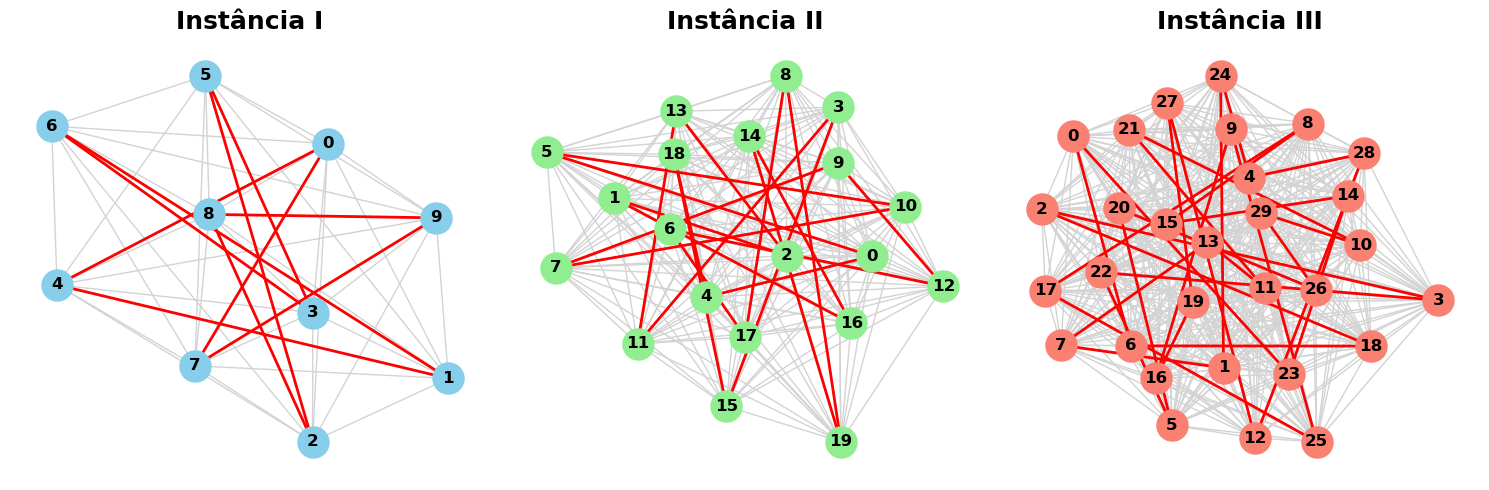

In [8]:
# Fixando parâmetro para geração de pontos aletórios para garantir reproducibilidade
np.random.seed(12345)

# Plotando a solução
# Criando figura com sub-gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

######### Plotando todas as instâncias e soluções
#### Grafo 1
pos1 = nx.spring_layout(inst1)

graph1 = nx.draw(inst1,
                 pos=pos1,
                 with_labels=True,
                 node_size=500,
                 node_color='skyblue', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[0])

axes[0].set_title('Instância I', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota1) - 1):
    edges_list.append((rota1[i], rota1[i + 1]))

edges_list.append((rota1[-1], rota1[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst1, pos=pos1, edgelist=edges_list,
                       edge_color='red', width=2.0, ax=axes[0])
    
#### Grafo 2
pos2 = nx.spring_layout(inst2)

graph2 = nx.draw(inst2,
                 pos=pos2,
                 with_labels=True, 
                 node_size=500,
                 node_color='lightgreen', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[1])

axes[1].set_title('Instância II', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list2 = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota2) - 1):
    edges_list2.append((rota2[i], rota2[i + 1]))

edges_list2.append((rota2[-1], rota2[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst2, 
                       pos=pos2, 
                       edgelist=edges_list2,
                       edge_color='red', 
                       width=2.0, 
                       ax=axes[1])

#### Grafo 3
pos3 = nx.spring_layout(inst3)

graph3 = nx.draw(inst3,
                 pos=pos3,
                 with_labels=True, 
                 node_size=500,
                 node_color='salmon',
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[2])

axes[2].set_title('Instância III', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list3 = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota3) - 1):
    edges_list3.append((rota3[i], rota3[i + 1]))

edges_list3.append((rota3[-1], rota3[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst3, 
                       pos=pos3, 
                       edgelist=edges_list3,
                       edge_color='red', 
                       width=2.0, 
                       ax=axes[2])

# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(m1.objVal, 2))
print(' Rota a ser realizada:', rota1)
print('\nInstância 2')
print(' Função Objetivo: R$', round(m2.objVal, 2))
print(' Rota a ser realizada para Instâcia 2:', rota2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(m3.objVal, 2))
print(' Rota a ser realizada para Instâcia 3:', rota3)

# Plotando imagem
plt.tight_layout()
plt.show()


**IMPORTANTE:** As visualizações acima são uma tentativa de representar a solução. As ilustrações não representam distâncias euclidinas e sim apenas representações da relação (arcos) entre nós. Este é um grafo complete, assumindo que é possível partir de qualquer e chegar diretamente a qualquer outro nó. Dessa forma, os arcos não possuem dimensões proporcionais aos seus valores (pesos dos arcos). Por tal razão apenas o valor de cada arco deve ser levado em conta na obtenção dos circuitos mínimos e não suas dimensões gráficas. Por tal razão é possível observar cruzamento de arcos, assim como dimensões gráficas não condizentes com os pesos de cada arco.

#### 3) Modelo matemático com restrição de sub-rota MTZ (Muller-Tucker-Zemlin)

##### Instância I

In [9]:
# Adptando os dados para a nova formulação
origens1 = [i for i in range(nodesInst1)]

destinos1 = [i for i in range(nodesInst1)]

custos1 = dict()
for i, origem in enumerate(origens1):
    for j, destino in enumerate(destinos1):
        custos1[origem, destino] = matDist1[i][j]

# Criando o modelo
mtz1 = gp.Model()

# Criando variáveis de decisão
x = mtz1.addVars(origens1, destinos1, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u = mtz1.addVars(origens1[1:], vtype=gp.GRB.INTEGER, ub=nodesInst1 - 1) 

# Criando a função objetivo
mtz1.setObjective(x.prod(custos1), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c1 = mtz1.addConstrs(gp.quicksum(x[i, j] for j in destinos1 if i != j) == 1 for i in origens1)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c2 = mtz1.addConstrs(gp.quicksum(x[i, j] for i in origens1 if i != j) == 1 for j in destinos1)

# Criando restrições de eleminação de subrotas de MTZ
c3 = mtz1.addConstrs(u[i] - u[j] + nodesInst1 * x[i, j] <= nodesInst1 - 1
                     for i in origens1[1:] for j in destinos1[1:] if i != j)

# Resolvendo o modelo
mtz1.optimize()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 92 rows, 109 columns and 396 nonzeros
Model fingerprint: 0x729eb867
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)
Found heuristic solution: objective 153.0000000

Root relaxation: objective 9.320000e+01, 33 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   9

##### Instância II

In [10]:
# Adptando os dados para a nova formulação
origens2 = [i for i in range(nodesInst2)]

destinos2 = [i for i in range(nodesInst2)]

custos2 = dict()
for i, origem in enumerate(origens2):
    for j, destino in enumerate(destinos2):
        custos2[origem, destino] = matDist2[i][j]

# Criando o modelo
mtz2 = gp.Model()

# Criando variáveis de decisão
x2 = mtz2.addVars(origens2, destinos2, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u2 = mtz2.addVars(origens2[1:], vtype=gp.GRB.INTEGER, ub=nodesInst2 - 1) 

# Criando a função objetivo
mtz2.setObjective(x2.prod(custos2), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c12 = mtz2.addConstrs(gp.quicksum(x2[i, j] for j in destinos2 if i != j) == 1 for i in origens2)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c22 = mtz2.addConstrs(gp.quicksum(x2[i, j] for i in origens2 if i != j) == 1 for j in destinos2)

# Criando restrições de eleminação de subrotas de MTZ
c32 = mtz2.addConstrs(u2[i] - u2[j] + nodesInst2 * x2[i, j] <= nodesInst2 - 1
                     for i in origens2[1:] for j in destinos2[1:] if i != j)

# Resolvendo o modelo
mtz2.optimize()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 382 rows, 419 columns and 1786 nonzeros
Model fingerprint: 0xb0aa60a3
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 2e+01]
Presolve removed 0 rows and 20 columns
Presolve time: 0.02s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 1041.0000000
Found heuristic solution: objective 1000.0000000

Root relaxation: objective 1.780000e+02, 70 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | I

##### Instância III

In [11]:
# Adptando os dados para a nova formulação
origens3 = [i for i in range(nodesInst3)]

destinos3 = [i for i in range(nodesInst3)]

custos3 = dict()
for i, origem in enumerate(origens3):
    for j, destino in enumerate(destinos3):
        custos3[origem, destino] = matDist3[i][j]

# Criando o modelo
mtz3 = gp.Model()

# Criando variáveis de decisão
x3 = mtz3.addVars(origens3, destinos3, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u3 = mtz3.addVars(origens3[1:], vtype=gp.GRB.INTEGER, ub=nodesInst3 - 1) 

# Criando a função objetivo
mtz3.setObjective(x3.prod(custos3), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c13 = mtz3.addConstrs(gp.quicksum(x3[i, j] for j in destinos3 if i != j) == 1 for i in origens3)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c23 = mtz3.addConstrs(gp.quicksum(x3[i, j] for i in origens3 if i != j) == 1 for j in destinos3)

# Criando restrições de eleminação de subrotas de MTZ
c33 = mtz3.addConstrs(u3[i] - u3[j] + nodesInst3 * x3[i, j] <= nodesInst3 - 1
                     for i in origens3[1:] for j in destinos3[1:] if i != j)

# Resolvendo o modelo
mtz3.optimize()


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 872 rows, 929 columns and 4176 nonzeros
Model fingerprint: 0x54d63ca7
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Presolve removed 0 rows and 30 columns
Presolve time: 0.00s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 1144.0000000

Root relaxation: objective 1.102000e+02, 125 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0 

##### Soluções das Três Instâncias

In [12]:
# Solução
#### Instância 1
vals1 = mtz1.getAttr('x', x)
selected1 = gp.tuplelist((i, j) for i, j in vals1.keys() if vals1[i, j] > 0.5)

# Verificando rota criada
rota1_mtz = []

# Start with the first connection
current_node1 = selected1[0][0]

# Add the first node of the first connection to the sequence
rota1_mtz.append(current_node1)

# Create a dictionary to keep track of used connections
used_connections1 = {connection: False for connection in selected1}

# Loop until all connections are used
while not all(used_connections1.values()):
    for connection in selected1:
        if not used_connections1[connection] and connection[0] == current_node1:
            # Add the second node of the connection to the sequence
            rota1_mtz.append(connection[1])
            current_node1 = connection[1]
            used_connections1[connection] = True

# Exclude the last element from the sequence
rota1_mtz = rota1_mtz[:-1]

#### Instância 2
vals2 = mtz2.getAttr('x', x2)
selected2 = gp.tuplelist((i, j) for i, j in vals2.keys() if vals2[i, j] > 0.5)

# Verificando rota criada
rota2_mtz = []

# Start with the first connection
current_node2 = selected2[0][0]

# Add the first node of the first connection to the sequence
rota2_mtz.append(current_node2)

# Create a dictionary to keep track of used connections
used_connections2 = {connection: False for connection in selected2}

# Loop until all connections are used
while not all(used_connections2.values()):
    for connection in selected2:
        if not used_connections2[connection] and connection[0] == current_node2:
            # Add the second node of the connection to the sequence
            rota2_mtz.append(connection[1])
            current_node2 = connection[1]
            used_connections2[connection] = True

# Exclude the last element from the sequence
rota2_mtz = rota2_mtz[:-1]

#### Instância 3
vals3 = mtz3.getAttr('x', x3)
selected3 = gp.tuplelist((i, j) for i, j in vals3.keys() if vals3[i, j] > 0.5)

# Verificando rota criada
rota3_mtz = []

# Start with the first connection
current_node3 = selected3[0][0]

# Add the first node of the first connection to the sequence
rota3_mtz.append(current_node3)

# Create a dictionary to keep track of used connections
used_connections3 = {connection: False for connection in selected3}

# Loop until all connections are used
while not all(used_connections3.values()):
    for connection in selected3:
        if not used_connections3[connection] and connection[0] == current_node3:
            # Add the second node of the connection to the sequence
            rota3_mtz.append(connection[1])
            current_node3 = connection[1]
            used_connections3[connection] = True

# Exclude the last element from the sequence
rota3_mtz = rota3_mtz[:-1]

# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(mtz1.objVal, 2))
print(' Rota a ser realizada:', rota1_mtz)
print('\nInstância 2')
print(' Função Objetivo: R$', round(mtz2.objVal, 2))
print(' Rota a ser realizada para Instâcia 2:', rota2_mtz)
print('\nInstância 3')
print(' Função Objetivo: R$', round(mtz3.objVal, 2))
print(' Rota a ser realizada para Instâcia 3:', rota3_mtz)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 146.0
 Rota a ser realizada: [0, 5, 2, 4, 1, 7, 8, 6, 9, 3]

Instância 2
 Função Objetivo: R$ 196.0
 Rota a ser realizada para Instâcia 2: [0, 15, 13, 18, 7, 16, 5, 11, 8, 6, 9, 4, 19, 3, 17, 14, 2, 10, 12, 1]

Instância 3
 Função Objetivo: R$ 141.0
 Rota a ser realizada para Instâcia 3: [0, 6, 12, 10, 20, 9, 28, 25, 19, 4, 21, 2, 1, 17, 5, 29, 22, 13, 14, 7, 16, 24, 8, 15, 18, 26, 11, 27, 3, 23]


#### 4) Heurística de Inserção do Mais Próximo

##### Instância I

In [13]:
# Dataframe a ser utilizado
# matDist1Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes = len(matDist1Df)
unvisited_nodes = list(range(1, num_nodes))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node = 0
visits = [current_node]

# Inicialize a variável para armazenar a distância total
total_distance = 0

# Enquanto houver nós não visitados
while unvisited_nodes:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node = min(unvisited_nodes, key=lambda node: min(matDist1Df.at[visited_node, node] for visited_node in visits))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance = matDist1Df.at[current_node, nearest_node]
    
    # Adicione a distância à distância total
    total_distance += distance
    
    # Adicione o nó mais próximo à sequência de visitas
    visits.append(nearest_node)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes.remove(nearest_node)
    
    # Atualize o nó atual para o nó mais próximo
    current_node = nearest_node

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node = visits[-1]
total_distance += matDist1Df.at[last_node, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits)
print("Distância total:", total_distance)


Sequência de visitas: [0, 5, 4, 1, 2, 3, 9, 8, 7, 6]
Distância total: 452.0


##### Instância II

In [14]:
# Dataframe a ser utilizado
# matDist2Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes2 = len(matDist2Df)
unvisited_nodes2 = list(range(1, num_nodes2))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node2 = 0
visits2 = [current_node2]

# Inicialize a variável para armazenar a distância total
total_distance2 = 0

# Enquanto houver nós não visitados
while unvisited_nodes2:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node2 = min(unvisited_nodes2, key=lambda node2: min(matDist2Df.at[visited_node2, node2] for visited_node2 in visits2))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance2 = matDist2Df.at[current_node2, nearest_node2]
    
    # Adicione a distância à distância total
    total_distance2 += distance2
    
    # Adicione o nó mais próximo à sequência de visitas
    visits2.append(nearest_node2)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes2.remove(nearest_node2)
    
    # Atualize o nó atual para o nó mais próximo
    current_node2 = nearest_node2

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node2 = visits2[-1]
total_distance2 += matDist2Df.at[last_node2, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits2)
print("Distância total:", total_distance2)


Sequência de visitas: [0, 15, 16, 5, 11, 8, 6, 9, 4, 19, 18, 13, 3, 7, 2, 10, 17, 14, 1, 12]
Distância total: 601.0


##### Instância III

In [15]:
# Dataframe a ser utilizado
# matDist3Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes3 = len(matDist3Df)
unvisited_nodes3 = list(range(1, num_nodes3))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node3 = 0
visits3 = [current_node3]

# Inicialize a variável para armazenar a distância total
total_distance3 = 0

# Enquanto houver nós não visitados
while unvisited_nodes3:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node3 = min(unvisited_nodes3, key=lambda node3: min(matDist3Df.at[visited_node3, node3] for visited_node3 in visits3))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance3 = matDist3Df.at[current_node3, nearest_node3]
    
    # Adicione a distância à distância total
    total_distance3 += distance3
    
    # Adicione o nó mais próximo à sequência de visitas
    visits3.append(nearest_node3)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes3.remove(nearest_node3)
    
    # Atualize o nó atual para o nó mais próximo
    current_node3 = nearest_node3

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node3 = visits3[-1]
total_distance3 += matDist3Df.at[last_node3, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits3)
print("Distância total:", total_distance3)


Sequência de visitas: [0, 6, 12, 10, 20, 4, 7, 8, 24, 29, 2, 21, 16, 13, 14, 22, 23, 3, 9, 28, 25, 11, 15, 26, 18, 17, 1, 19, 5, 27]
Distância total: 692.0


##### Soluções das Três Instâncias

In [16]:
# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(total_distance, 2))
print(' Rota Instâcia 1:', visits)
print('\nInstância 2')
print(' Função Objetivo: R$', round(total_distance2, 2))
print(' Rota Instâcia 2:', visits2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(total_distance3, 2))
print(' Rota Instâcia 3:', visits3)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 452.0
 Rota Instâcia 1: [0, 5, 4, 1, 2, 3, 9, 8, 7, 6]

Instância 2
 Função Objetivo: R$ 601.0
 Rota Instâcia 2: [0, 15, 16, 5, 11, 8, 6, 9, 4, 19, 18, 13, 3, 7, 2, 10, 17, 14, 1, 12]

Instância 3
 Função Objetivo: R$ 692.0
 Rota Instâcia 3: [0, 6, 12, 10, 20, 4, 7, 8, 24, 29, 2, 21, 16, 13, 14, 22, 23, 3, 9, 28, 25, 11, 15, 26, 18, 17, 1, 19, 5, 27]


#### 5) Heurística de Inserção do Mais Distante

##### Instância I

In [17]:
# Dataframe a ser utilizado
# matDist1Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD = len(matDist1Df)
unvisited_nodes_MD = list(range(1, num_nodes_MD))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD = 0
visits_MD = [current_node_MD]

# Inicialize a variável para armazenar a distância total
total_distance_MD = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD = max(unvisited_nodes_MD, key=lambda node_MD: max(matDist1Df.at[visited_node_MD, node_MD] for visited_node_MD in visits_MD))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD = matDist1Df.at[current_node_MD, furthest_node_MD]
    
    # Adicione a distância à distância total
    total_distance_MD += distance_MD
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD.append(furthest_node_MD)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD.remove(furthest_node_MD)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD = furthest_node_MD

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD = visits_MD[-1]
total_distance_MD += matDist1Df.at[last_node, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD)
print("Distância total:", total_distance_MD)


Sequência de visitas: [0, 8, 2, 9, 1, 6, 4, 3, 7, 5]
Distância total: 705.0


##### Instância II

In [18]:
# Dataframe a ser utilizado
# matDist2Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD2 = len(matDist2Df)
unvisited_nodes_MD2 = list(range(1, num_nodes_MD2))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD2 = 0
visits_MD2 = [current_node_MD2]

# Inicialize a variável para armazenar a distância total
total_distance_MD2 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD2:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD2 = max(unvisited_nodes_MD2, key=lambda node_MD2: max(matDist2Df.at[visited_node_MD2, node_MD2] for visited_node_MD2 in visits_MD2))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD2 = matDist2Df.at[current_node_MD2, furthest_node_MD2]
    
    # Adicione a distância à distância total
    total_distance_MD2 += distance_MD2
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD2.append(furthest_node_MD2)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD2.remove(furthest_node_MD2)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD2 = furthest_node_MD2

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD2 = visits_MD2[-1]
total_distance_MD2 += matDist2Df.at[last_node_MD2, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD2)
print("Distância total:", total_distance_MD2)


Sequência de visitas: [0, 12, 6, 5, 9, 7, 8, 19, 2, 13, 3, 15, 11, 1, 17, 10, 16, 4, 14, 18]
Distância total: 1476.0


##### Instância III

In [19]:
# Dataframe a ser utilizado
# matDist3Df

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD3 = len(matDist3Df)
unvisited_nodes_MD3 = list(range(1, num_nodes_MD3))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD3 = 0
visits_MD3 = [current_node_MD3]

# Inicialize a variável para armazenar a distância total
total_distance_MD3 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD3:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD3 = max(unvisited_nodes_MD3, key=lambda node_MD3: max(matDist3Df.at[visited_node_MD3, node_MD3] for visited_node_MD3 in visits_MD3))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD3 = matDist3Df.at[current_node_MD3, furthest_node_MD3]
    
    # Adicione a distância à distância total
    total_distance_MD3 += distance_MD3
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD3.append(furthest_node_MD3)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD3.remove(furthest_node_MD3)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD3 = furthest_node_MD3

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD3 = visits_MD3[-1]
total_distance_MD3 += matDist3Df.at[last_node_MD3, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD3)
print("Distância total:", total_distance_MD3)


Sequência de visitas: [0, 12, 5, 26, 8, 17, 9, 27, 19, 14, 10, 25, 20, 7, 1, 3, 4, 6, 18, 16, 29, 15, 21, 24, 13, 11, 28, 23, 22, 2]
Distância total: 2154.0


##### Soluções das Três Instâncias

In [20]:
# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(total_distance_MD, 2))
print(' Rota Instâcia 1:', visits_MD)
print('\nInstância 2')
print(' Função Objetivo: R$', round(total_distance_MD2, 2))
print(' Rota Instâcia 2:', visits_MD2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(total_distance_MD3, 2))
print(' Rota Instâcia 3:', visits_MD3)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 705.0
 Rota Instâcia 1: [0, 8, 2, 9, 1, 6, 4, 3, 7, 5]

Instância 2
 Função Objetivo: R$ 1476.0
 Rota Instâcia 2: [0, 12, 6, 5, 9, 7, 8, 19, 2, 13, 3, 15, 11, 1, 17, 10, 16, 4, 14, 18]

Instância 3
 Função Objetivo: R$ 2154.0
 Rota Instâcia 3: [0, 12, 5, 26, 8, 17, 9, 27, 19, 14, 10, 25, 20, 7, 1, 3, 4, 6, 18, 16, 29, 15, 21, 24, 13, 11, 28, 23, 22, 2]


#### 6) Heurística de Inserção Mais Econômica

##### Instância I

In [ ]:
## 1h08min




##### Instância II

##### Instância III

##### Soluções das Três Instâncias

#### 7) Comparando Métodos de Solução

### Fim